In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar

In [24]:
class Schrodinger:
    
    def __init__(self,a,b,N,V):
        
        self.x=np.linspace(a,b,N)
        h = self.x[1]-self.x[0]
        plt.plot(self.x,V(self.x))
        
        T = np.zeros((N-2)**2).reshape(N-2,N-2)
        for i in range(N-2):
            for j in range(N-2):
                if i==j:
                    T[i,j]= -2
                elif np.abs(i-j)==1:
                    T[i,j]=1

        self.T = T
        
        V_i = np.zeros((N-2)**2).reshape(N-2,N-2)
        for i in range(N-2):
            for j in range(N-2):
                if i==j:
                    V_i[i,j]= V(self.x[i+1])
                    
                    
        self.V_i = V_i
        
        self.H = -(6.582119624 *10**(-16))**2 / (0.510998928*10**(6))*9*10**(16) *self.T/(2*h**2) + self.V_i
        
        self.val,self.vec=np.linalg.eig(self.H)
        

        

    def Phi(self,n):


        phi=[]
        for i in range(n):
            phi.append([])
        for i in range(n):
            phi[i] = np.append(phi[i],self.vec[:,np.argsort(self.val)[0:n][i]])
            phi[i] = np.append(phi[i],0)
            phi[i] = np.insert(phi[i],0,0)

        self.phi = phi
        for i in range(n):
            fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(15,10))  
            ax1.plot(self.x,self.phi[i])
            ax1.set(xlabel="x", ylabel="$\psi(x)$",title="Función de onda para n=%3.0f"%(i+1))
            ax1.grid()
            ax2.plot(self.x,abs(self.phi[i])**2)
            ax2.set(xlabel="x", ylabel="$|\psi(x)|^{2}$",title="Modulo al cuadrado de la función de onda para n=%3.0f"%(i+1))
            ax2.grid()
            plt.show()

In [36]:
def  Vpot(x):
    y=np.piecewise(x, [x < -10**(-10), x >= 10**(-10)],[lambda x:200, lambda x:200])
    return y

def Vpot_inf(x):  # Pozo de potencial infinito
    y=np.piecewise(x, [x < -1*10**(-10), x >= 1*10**(-10)],[lambda x:10**32, lambda x:10**32])
    return y

def oscilador(x):
    return x**2

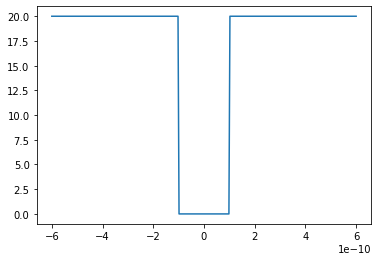

In [37]:
a = Schrodinger(-6*10**(-10),6*10**(-10),300,Vpot)

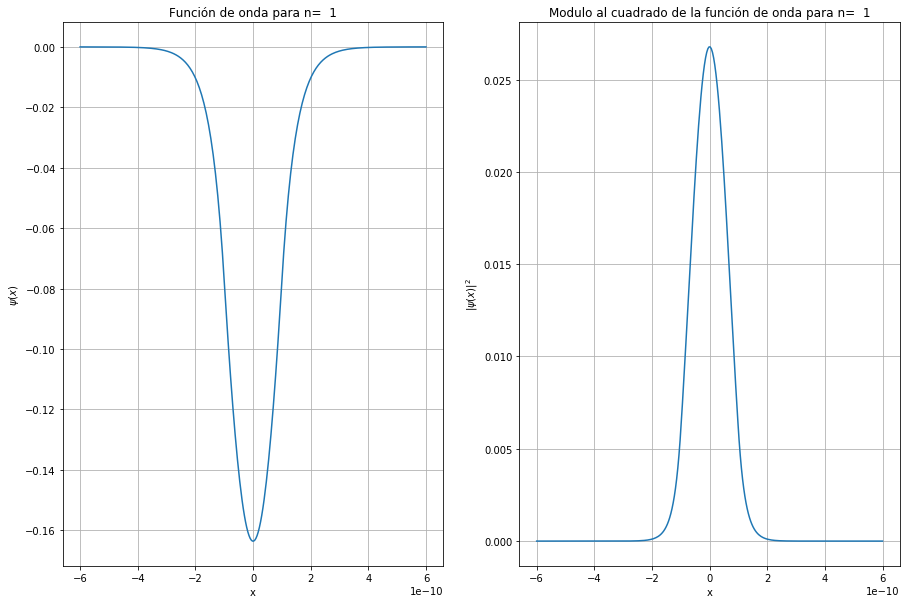

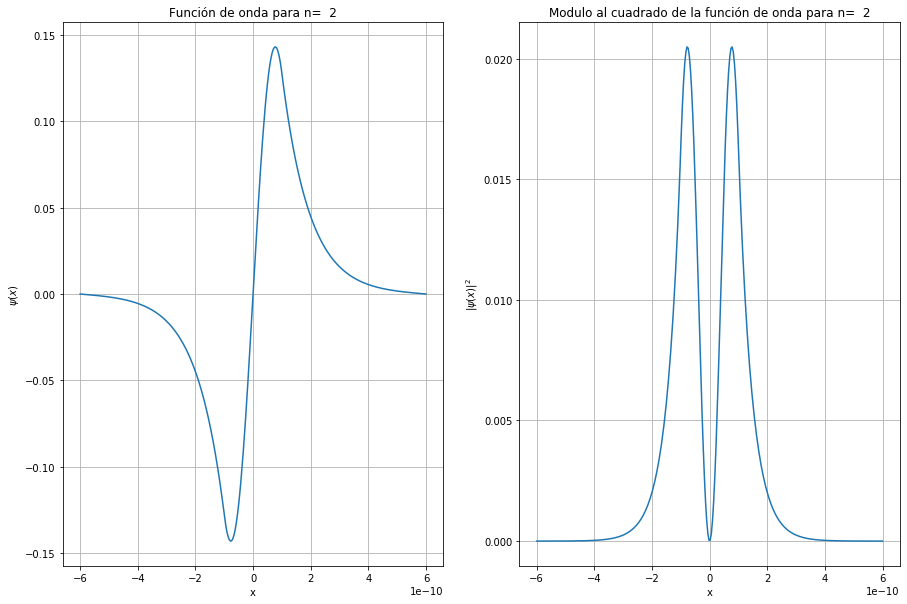

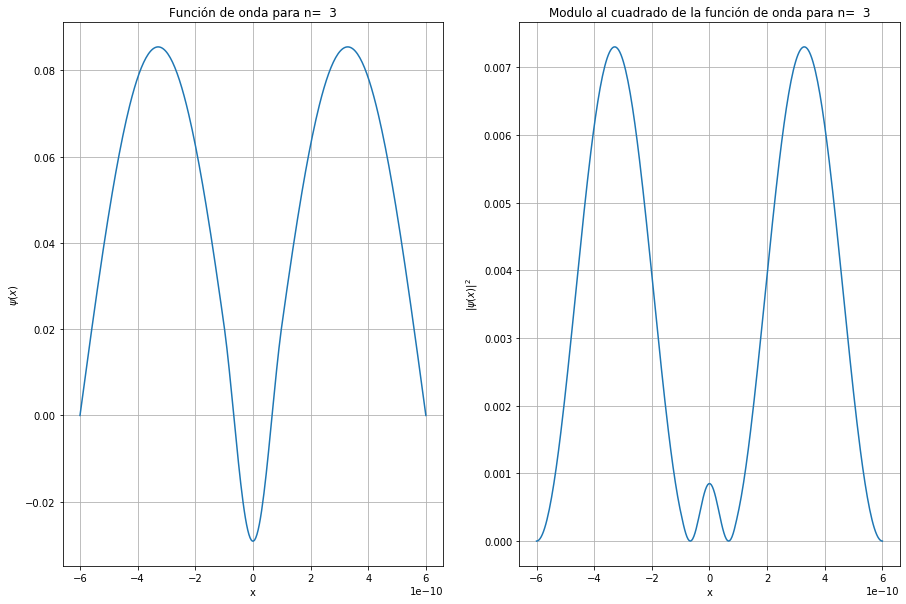

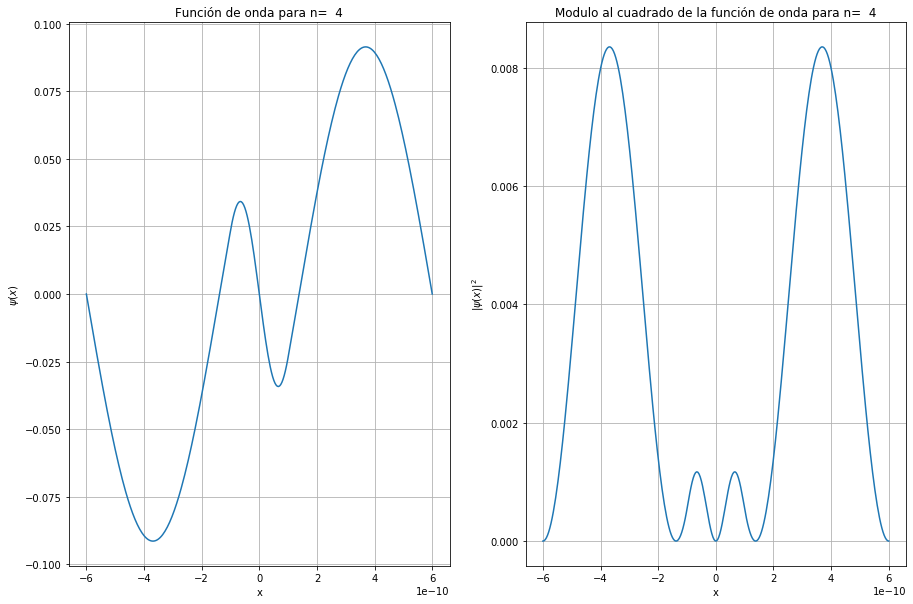

In [38]:
a.Phi(4)

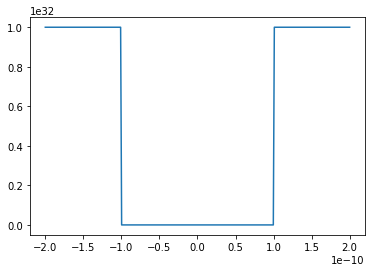

In [40]:
b = Schrodinger(-2*10**(-10),2*10**(-10),300,Vpot_inf)

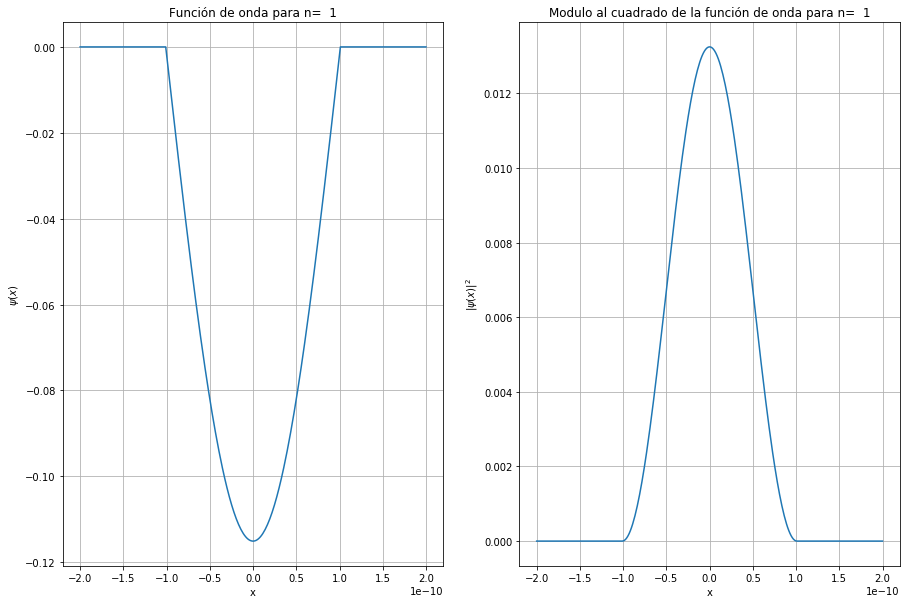

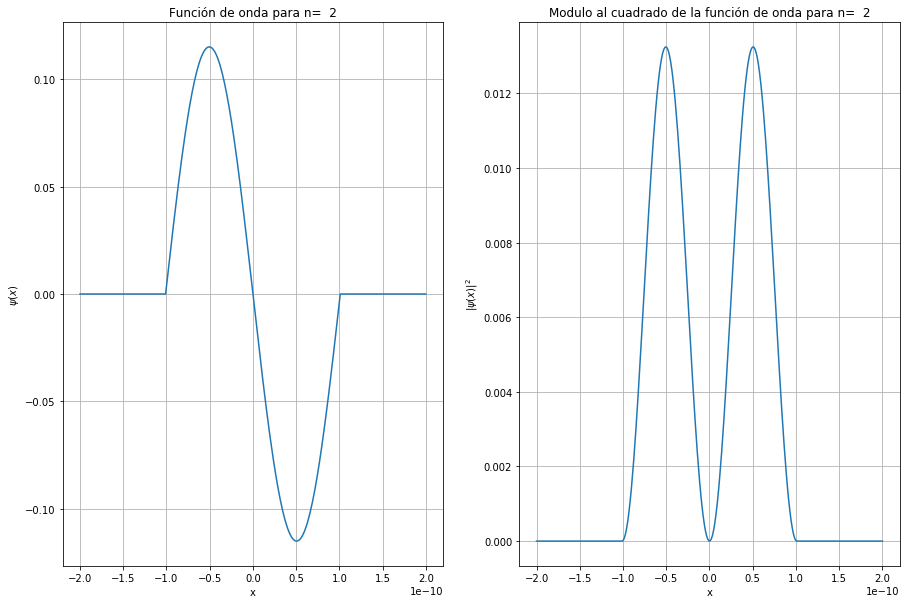

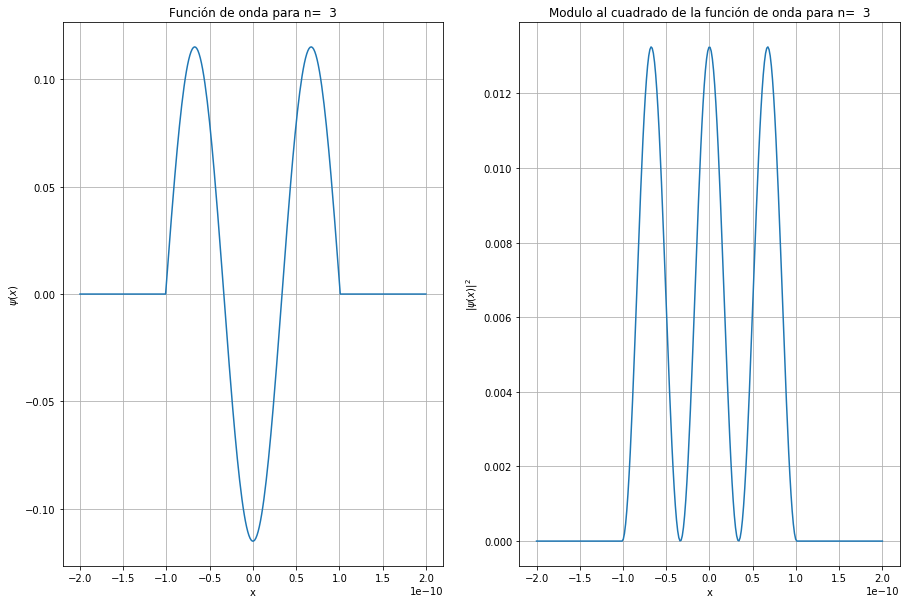

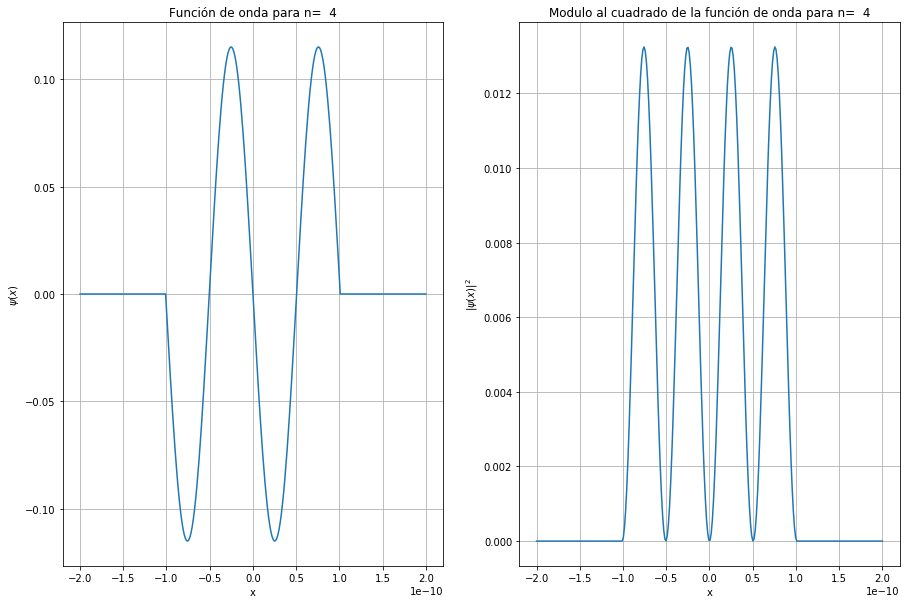

In [41]:
b.Phi(4)

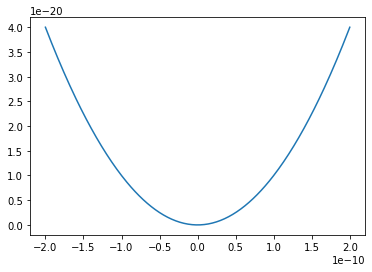

In [42]:
c = Schrodinger(-2*10**(-10),2*10**(-10),300,oscilador)

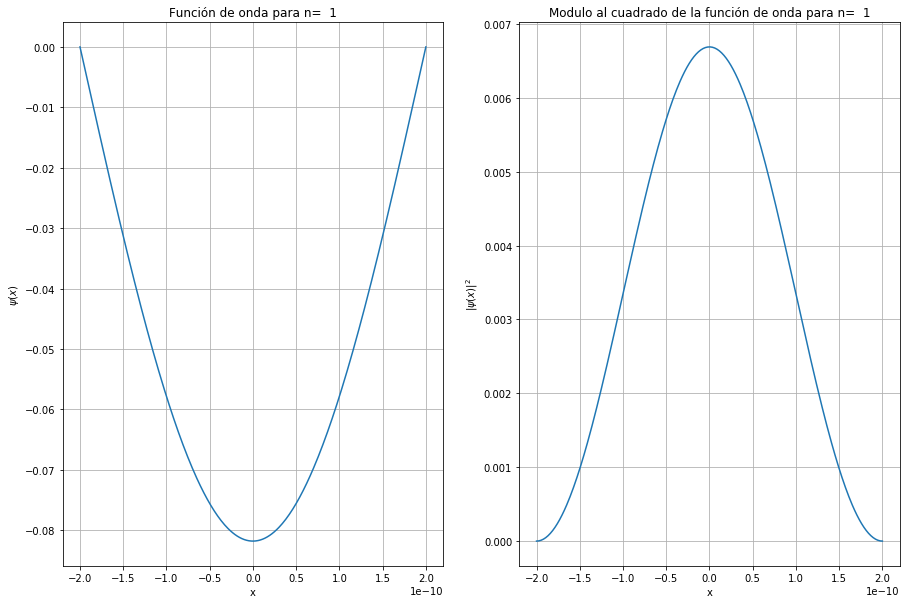

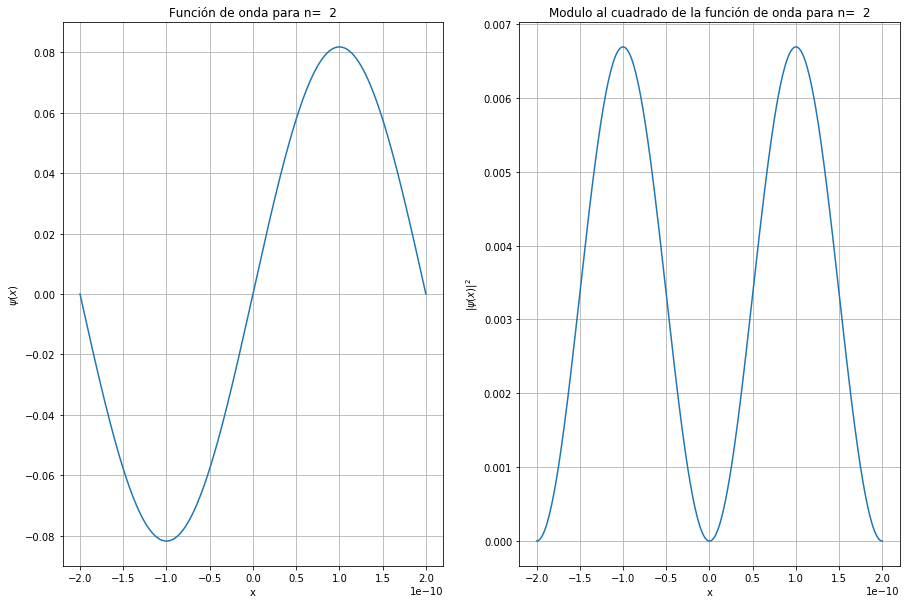

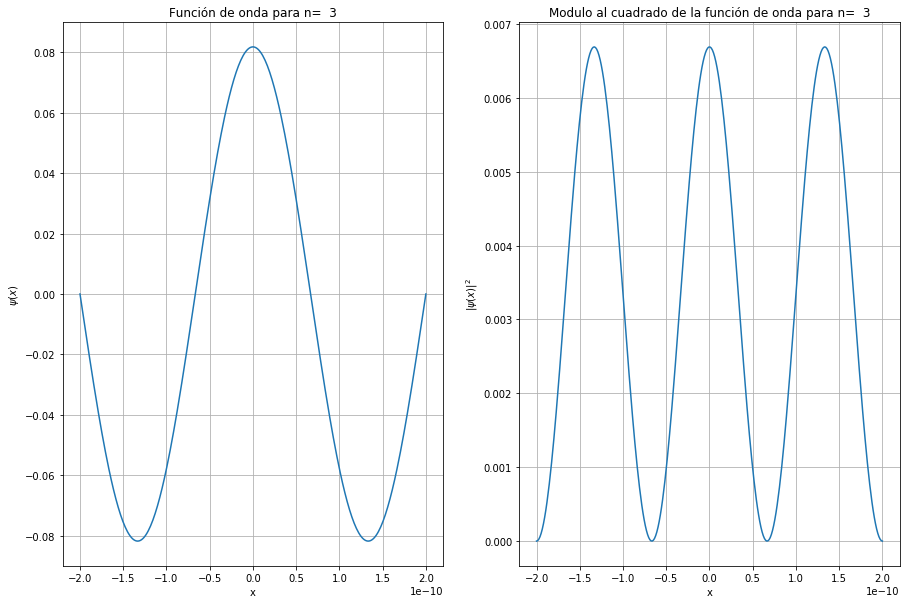

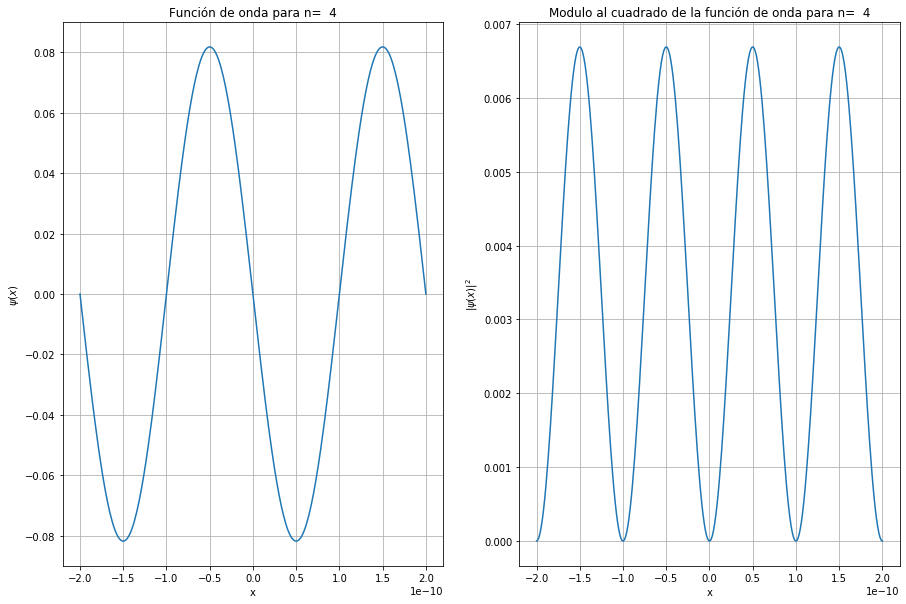

In [43]:
c.Phi(4)

In [10]:
a.autovalor

AttributeError: 'Schrodinger' object has no attribute 'autovalor'

In [39]:
a.val[np.argsort(a.val)]

array([4.42506701e+00, 1.58320472e+01, 2.12803338e+01, 2.17641051e+01,
       2.49338705e+01, 2.65428970e+01, 3.06128496e+01, 3.38483800e+01,
       3.82767739e+01, 4.34184150e+01, 4.82287591e+01, 5.50002972e+01,
       6.06371105e+01, 6.83929129e+01, 7.54128303e+01, 8.36351105e+01,
       9.23415967e+01, 1.01007075e+02, 1.11187514e+02, 1.20710003e+02,
       1.31821942e+02, 1.42689872e+02, 1.54345417e+02, 1.66735757e+02,
       1.78997147e+02, 1.92640023e+02, 2.05899065e+02, 2.20345647e+02,
       2.34958274e+02, 2.49992209e+02, 2.65972375e+02, 2.81764287e+02,
       2.98790520e+02, 3.15697902e+02, 3.33429128e+02, 3.51659044e+02,
       3.70040694e+02, 3.89467212e+02, 4.08742653e+02, 4.29039783e+02,
       4.49495422e+02, 4.70449761e+02, 4.92142672e+02, 5.13832842e+02,
       5.36543971e+02, 5.59233503e+02, 5.82684225e+02, 6.06555123e+02,
       6.30665690e+02, 6.55643583e+02, 6.80582423e+02, 7.06412131e+02,
       7.32409931e+02, 7.58900343e+02, 7.86018485e+02, 8.13209428e+02,
      

In [45]:
c.val[np.argsort(c.val)][0:4]/c.val[np.argsort(c.val)][0]

array([ 1.        ,  3.9998896 ,  8.99933764, 15.99779218])